In [8]:
#imports
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import random


reading the dataset

In [9]:
def read_csv(file_path,has_header):
    """this function is used for taking the dataset from .csv file making a test train split
    and x, y split (has header is either True or False)"""

    #reading the .csv
    if has_header:
        df = pd.read_csv(file_path, header=0, delimiter=",")  # First row as header
        print(f"Dataset shape: {df.shape}")
        print(f"Column names: {list(df.columns)}")
    else:
        df = pd.read_csv(file_path, header=None, delimiter=",")  # No header row
        print(f"Dataset shape: {df.shape}")
    
    return df


selecting the dataset

In [10]:
df = read_csv("beans_kmeans.csv", True)
label_column = 16
number_of_sets = 4

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [ ]:
df = read_csv("diabetes_kmeans.csv", True)
label_column = 8
number_of_sets = 3

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [ ]:
df = read_csv("divorce.csv", True)
label_column = 54
number_of_sets = 14

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [ ]:
df = read_csv("parkinsons_kmeans.csv", True)
label_column = 17
number_of_sets = 6

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [ ]:
df = read_csv("rice_binned_kmeans.csv", True)
label_column = 7
number_of_sets = 2

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [ ]:
df = read_csv("wdbc_binned._kmeans.csv", True)
label_column = 1
number_of_sets = 8

Dataset shape: (13611, 17)
Column names: ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


making string columns numeric

In [11]:
# Find all string/object columns automatically
string_columns = df.select_dtypes(include=['object']).columns

# Encode all string columns
for column in string_columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])

mi for all features (graph)

In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


            Feature  MI_Score
1         Perimeter  1.005183
7     EquivDiameter  0.968320
2   MajorAxisLength  0.954053
6        ConvexArea  0.942731
0              Area  0.930840
13     ShapeFactor2  0.921788
12     ShapeFactor1  0.895537
3   MinorAxisLength  0.872991
11      Compactness  0.810451
14     ShapeFactor3  0.808186
4      AspectRation  0.797310
5      Eccentricity  0.783563
10        roundness  0.767800
15     ShapeFactor4  0.338329
9          Solidity  0.223004
8            Extent  0.193118


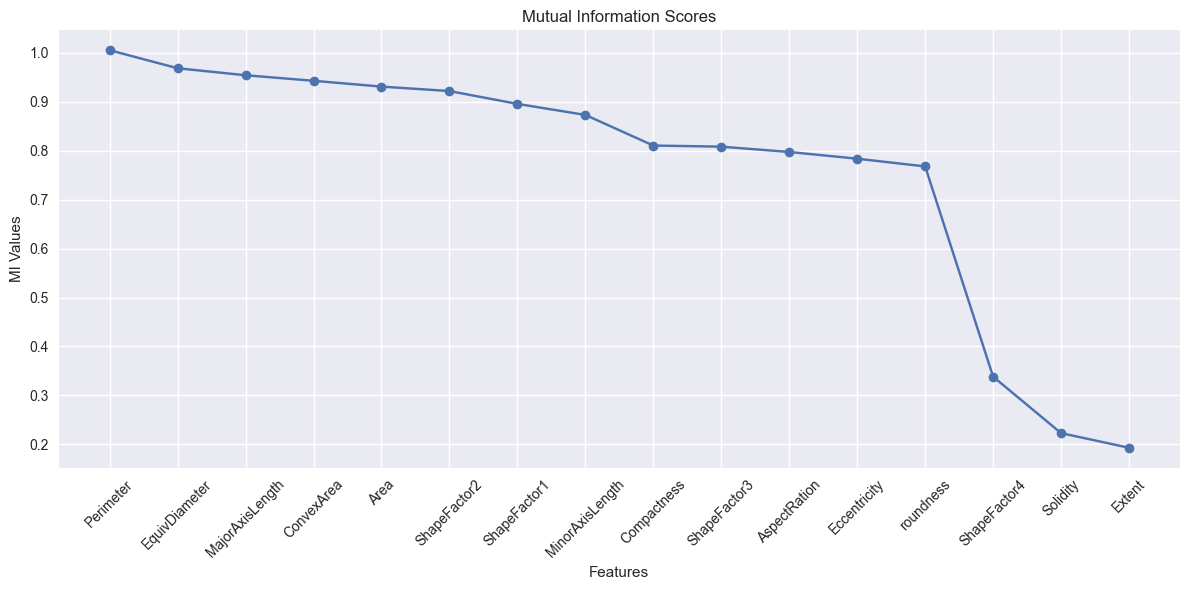

In [13]:
def mi_for_all(df_name = df, lc = label_column):
    y = df_name.iloc[:, lc]
    x = df_name.drop(df_name.columns[lc], axis=1)
    mi_scores = mutual_info_classif(x, y, discrete_features=True)
    mi_df = pd.DataFrame({"Feature": x.columns, "MI_Score": mi_scores}).sort_values(by="MI_Score", ascending=False)
    print(mi_df)

    # Create line plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(mi_df["Feature"], mi_df["MI_Score"], marker='o')
    ax.set_xlabel("Features")
    ax.set_ylabel("MI Values")
    ax.set_title("Mutual Information Scores")
    plt.style.use('seaborn-v0_8')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return x,y,mi_df

x,y,mi_df= mi_for_all()



vertical split

In [14]:
# Target columns count (divide into 3 parts, take integer)
#total_columns = df.shape[1]
#target_columns_count = total_columns // 3
# Pick random feature columns from total number of columns from dataset x
#random.seed(42)
#random_cols = random.sample(range(x.shape[1]), target_columns_count - 1)
# Build target_set (label first, then random features)
#target_features = x.iloc[:, random_cols]
#target_set = pd.concat([y, target_features], axis=1)
#remaining_set = x.drop(x.columns[random_cols], axis=1)
#print("Target columns count:", target_columns_count)
#print("Selected feature indices:", random_cols)
#print(target_set.head(), "\n")
#print(remaining_set.head())

# Split the feature indices into groups
parts = np.split(np.arange(x.shape[1]), number_of_sets, axis=0)

# Get the first group of feature indices
target_feature_indices = parts[0]

# Select the target features using column indices
target_features = x.iloc[:, target_feature_indices]

# Create target set by concatenating y with target features
target_set = pd.concat([y, target_features], axis=1)

# Create remaining set by dropping the target feature columns
remaining_set = x.drop(x.columns[target_feature_indices], axis=1)

print("Selected feature indices:", target_feature_indices)
print("Target set shape:", target_set.shape)
print(target_set.head(), "\n")
print("Remaining set shape:", remaining_set.shape)
print(remaining_set.head())


Selected feature indices: [0 1 2 3]
Target set shape: (13611, 5)
   Class  Area  Perimeter  MajorAxisLength  MinorAxisLength
0      5     0        0.0              0.0              1.0
1      5     0        0.0              0.0              2.0
2      5     0        0.0              0.0              1.0
3      5     0        0.0              0.0              2.0
4      5     0        0.0              0.0              2.0 

Remaining set shape: (13611, 12)
   AspectRation  Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  \
0           0.0           4.0           0            0.0     9.0      11.0   
1           0.0           1.0           0            0.0    11.0       9.0   
2           1.0           4.0           0            0.0    10.0      12.0   
3           0.0           3.0           0            0.0    10.0       6.0   
4           0.0           1.0           0            0.0    10.0      13.0   

   roundness  Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  \


mi on the set with label to find the target (lowest mi)

           Feature  MI_Score
1        Perimeter  1.005183
2  MajorAxisLength  0.954053
0             Area  0.930840
3  MinorAxisLength  0.872991


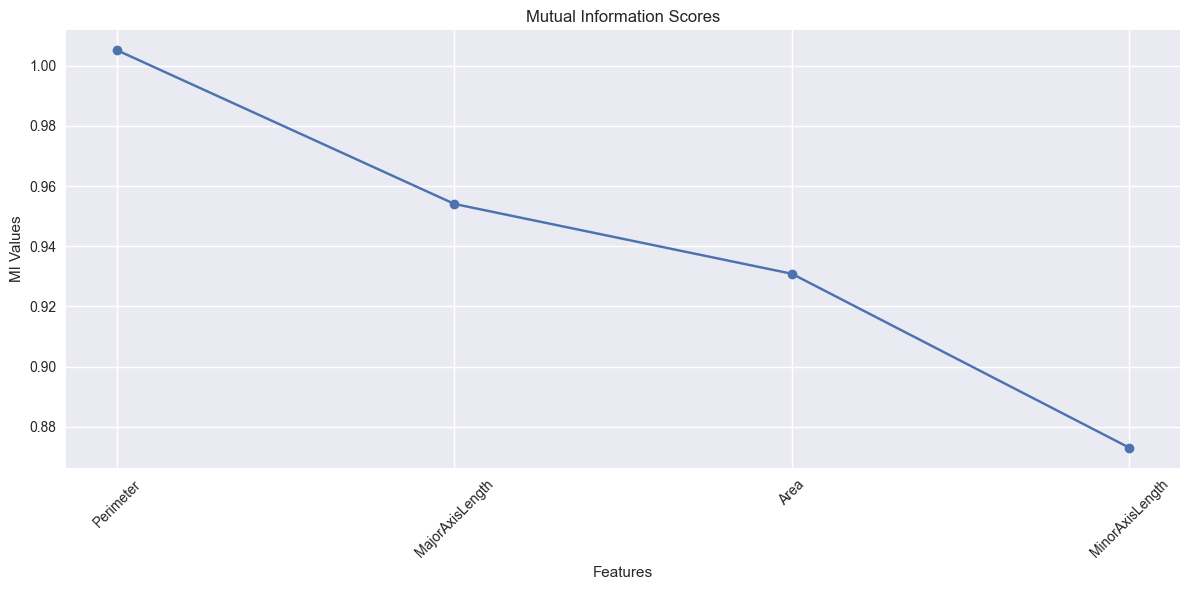

Column with lowest MI: MinorAxisLength
Spearman correlations between 'MinorAxisLength' and remaining_set:
          Feature  Spearman_Correlation
8    ShapeFactor1              0.982100
3   EquivDiameter              0.834411
2      ConvexArea              0.830429
9    ShapeFactor2              0.435675
6       roundness              0.269252
11   ShapeFactor4              0.258512
5        Solidity              0.125558
4          Extent              0.121150
10   ShapeFactor3              0.044849
7     Compactness              0.044039
1    Eccentricity              0.038605
0    AspectRation              0.037259


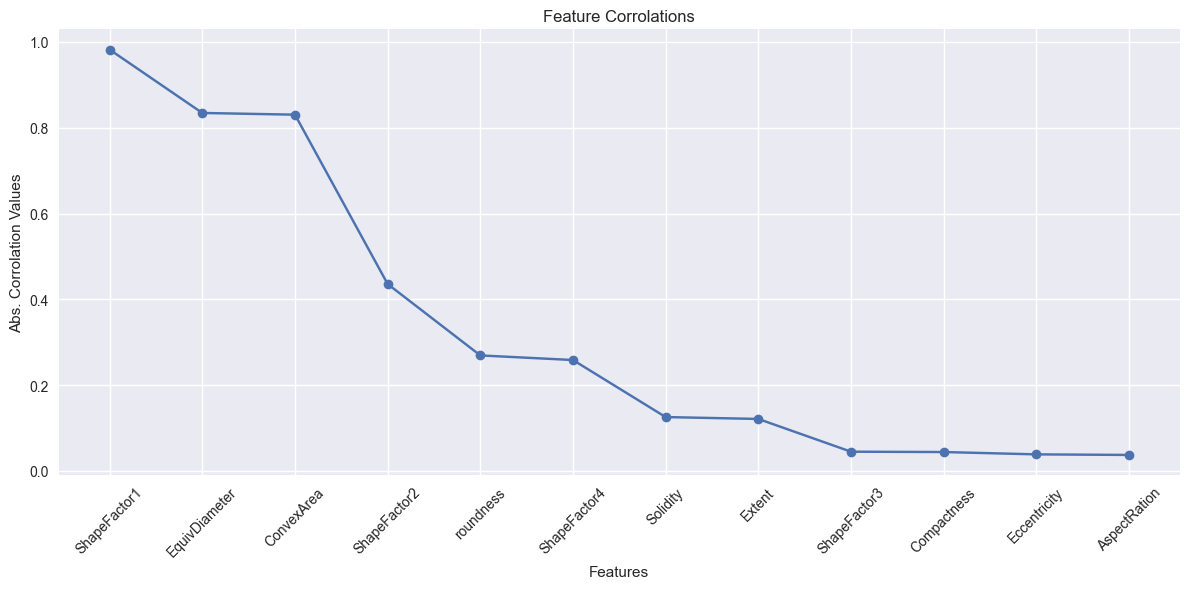

In [15]:
# Get MI scores and find lowest MI column
x,y,mi_df = mi_for_all(df_name=target_set, lc=0)
lowest_mi_column = mi_df.iloc[-1]['Feature']
print(f"Column with lowest MI: {lowest_mi_column}")

# Calculate Spearman correlations
lowest_mi_data = target_set[lowest_mi_column]
correlations = remaining_set.corrwith(lowest_mi_data, method='spearman')

# Convert to DataFrame and sort
corr_df = pd.DataFrame({
    'Feature': correlations.index,
    'Spearman_Correlation': correlations.abs().values
}).sort_values('Spearman_Correlation', ascending=False)

print(f"Spearman correlations between '{lowest_mi_column}' and remaining_set:")
print(corr_df)

# Create line plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(corr_df["Feature"], corr_df["Spearman_Correlation"], marker='o')
ax.set_xlabel("Features")
ax.set_ylabel("Abs. Corrolation Values")
ax.set_title("Feature Corrolations")
plt.style.use('seaborn-v0_8')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

spearman with target to varibales that are outside the set (graph to see elbow)